# DT2470 Lab 02: Teh Machine Learnings

by Bob L. T. Sturm

In this lab you will practice some fundamental concepts of machine learning. In the first part you will work with an artificial dataset. The second part involves a music dataset. There's a lot more to explore, so this lab only scratches the surface!

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python.

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Pandas API](https://pandas.pydata.org/docs/reference/index.html#api)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.


---



# Part 1: Basics

In this part, you will explore some basic principles of machine learning. First we are going to synthesize a "toy" dataset, where we know everything about the data. This is the "best case scenario", and can help us understand ML methods and their parameters, as well as debug implementations.

For more information:
- [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html) 

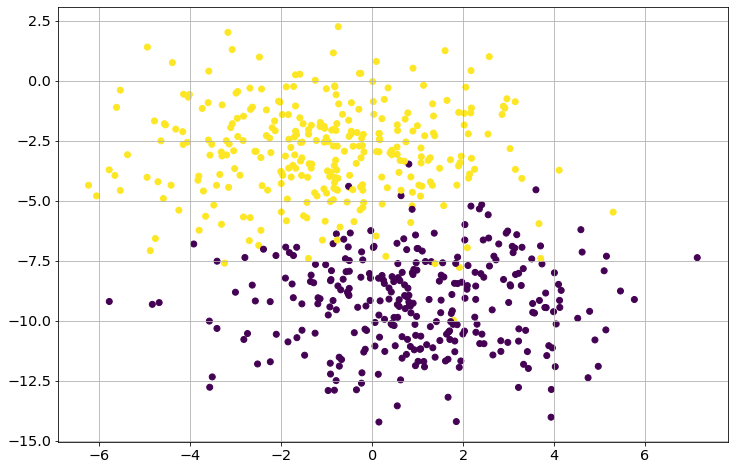

In [35]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

numClasses = 2 # number of separate classes
numObservations = numClasses*300 # number of total observations
cluster_std = 2 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(); plt.show()

# 1.1
Create a 80/20 train/test split of your data. See [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) for the function *train_test_split*.

In [36]:
from sklearn.model_selection import train_test_split
# add your code below
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# 1.2

Create an instance of a nearest neighbor classifier and train it with your *training* data. See [sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) for the appropriate function.

In [37]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
num_neigh = 10
kclassifier = KNeighborsClassifier(n_neighbors= num_neigh)
kclassifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

# 1.3 

Plot the decision boundary of your trained classifier. Use the *plot_decision_regions* function in [mlxtend.plotting](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions).

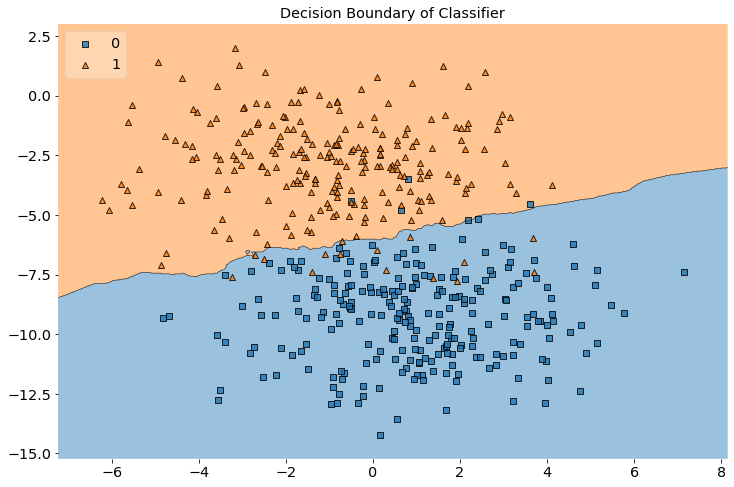

In [38]:
from mlxtend.plotting import plot_decision_regions
# add your code below
# decision boundary
plt.figure(1)
plot_decision_regions(X_train, y_train, clf=kclassifier, legend=2)
plt.title('Decision Boundary of Classifier')
plt.show()

# 1.4

Use your classifier to label the hold out set, and print out the predicted labels and true labels. 

In [39]:
# add your code below
y_pred = kclassifier.predict(X_test)
print("Predicted Labels:", y_pred)
print("True Labels:", y_test)

Predicted Labels: [0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1
 0 1 0 1 0 1 1 0 0]
True Labels: [0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 0 1 0 1 1 0 0]


# 1.5 

Print the confusion matrix of the results. See [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a relevant function.

Confusion Matrix: 
 [[53  2]
 [ 2 63]]


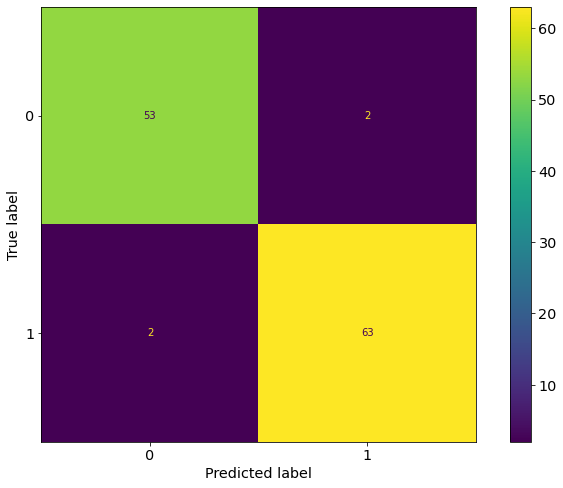

In [40]:
# add your code below
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)   #confusion matrix
print("Confusion Matrix: \n", conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

# 1.6

Use the *classification_report* function of [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to print out more metrics for your classifier.

In [41]:
from sklearn.metrics import classification_report
# add your code below
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.97      0.97      0.97        65

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



# 1.7 

Now you will explore k nearest neighbor classification with the toy dataset.
Create a 50/30/20 train/validation/test split of your data.

In [42]:
# add your code below
from sklearn.model_selection import train_test_split

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.40, random_state=42)


# 1.8

For k in 1 to 51 by odd integers, train a kNN classifier and compute its accuracy on the training dataset and the validation dataset. Plot these accuracies as a function of k.

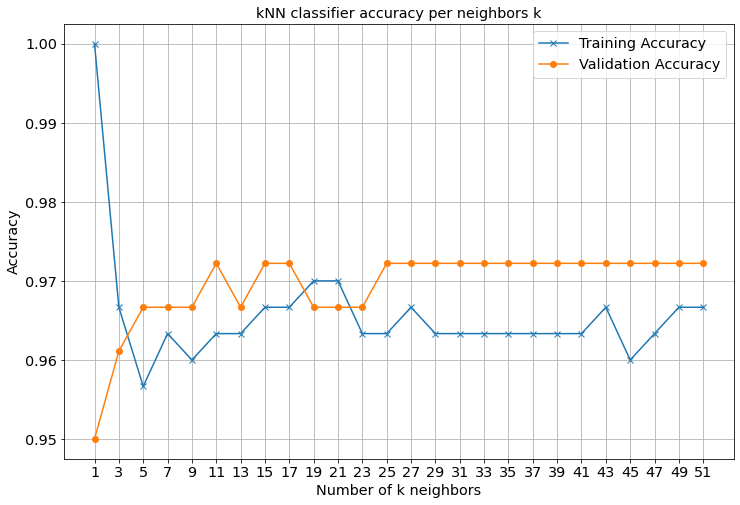

In [43]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracies_array = []
val_accuracies_array = []
k_neighbors = list(range(1, 52, 2))     #range of odd values of k from 1 to 51

for k in k_neighbors:
    k_classifier = KNeighborsClassifier(n_neighbors=k) #create knn classifier
    k_classifier.fit(X_train, y_train) #train it

    train_accuracies_array.append(k_classifier.score(X_train, y_train))
    val_accuracies_array.append(k_classifier.score(X_val, y_val))

#print(np.array((k_neighbors, val_accuracies_array)).T)
    
# training and validation accuracies as a function of k
plt.figure()
plt.plot(k_neighbors, train_accuracies_array, label='Training Accuracy', marker='x')
plt.plot(k_neighbors, val_accuracies_array, label='Validation Accuracy', marker='o')
plt.title('kNN classifier accuracy per neighbors k')
plt.ylabel('Accuracy')
plt.xlabel('Number of k neighbors')
plt.xticks(k_neighbors)
plt.legend()
plt.grid(True)
plt.show()

## Generalization, Overfitting, and Underfitting

* If a model is able to make accurate predictions on unseen data: 
    * it is able to **generalize** from the training set to the test set.
* Building a model that is too complex for the amount of information in the data is called overfitting.
* This refers to the complexity of the decision boundary, **NOT** computational complexity.

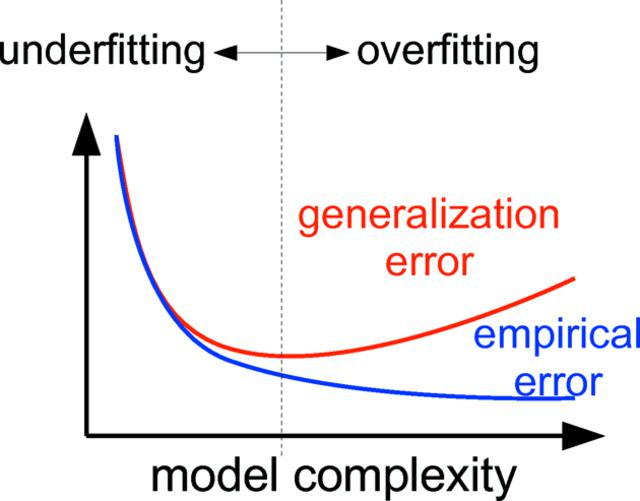

# 1.9

The complexity of KNN models decreases with K. Find the K with the highest validation accuracy, and train a kNN classifier with that K on the training data. Test it on the testing data and print its classification_report. If there are several possible K, choose one by some strategy.

In [44]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


max_value = np.max(val_accuracies_array)
#print(max_value)
kmax_values_array = []
j = 0
for i in k_neighbors:
    
    if val_accuracies_array[j] == max_value:
        kmax_values_array.append(i)
    j+=1

#print(kmax_values_array)
# CHOOSE THE HIGHEST INDEX IN ORDER TO AVOID OVERFITTING AND TO OBTAIN LOWER COMPLEXITY
best_k_value = kmax_values_array[-1]

best_k_classifier = KNeighborsClassifier(n_neighbors=best_k_value) # Create and train the best_k_value KNN classifier 
best_k_classifier.fit(X_train, y_train)

y_pred = best_k_classifier.predict(X_test)  # test the classifier
report = classification_report(y_test, y_pred)
print("Classification Report for kNN with k =", best_k_value, "\n",report)

Classification Report for kNN with k = 51 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        65
           1       0.91      0.95      0.93        55

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



# 1.10
For this classifier, plot its decision boundary, and compare with the boundary you see in #1.3.

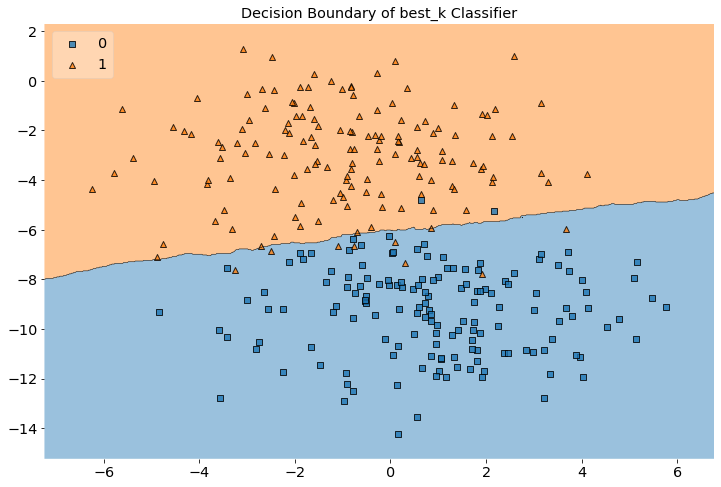

In [45]:
# add your code below
plt.figure()
plot_decision_regions(X_train, y_train, clf=best_k_classifier, legend=2)
plt.title('Decision Boundary of best_k Classifier')
plt.show()

The decision boundary with the best_k_classifier is much more smooth and provides a better overall division between the two sides. So in the end, the boundary in #1.3 is still good but not better than this one.

# 1.11

Change the toy dataset (number of classes, number of observations, cluster spread) and repeat the above. What happens as the cluster spread increase? What happens if there are more classes?

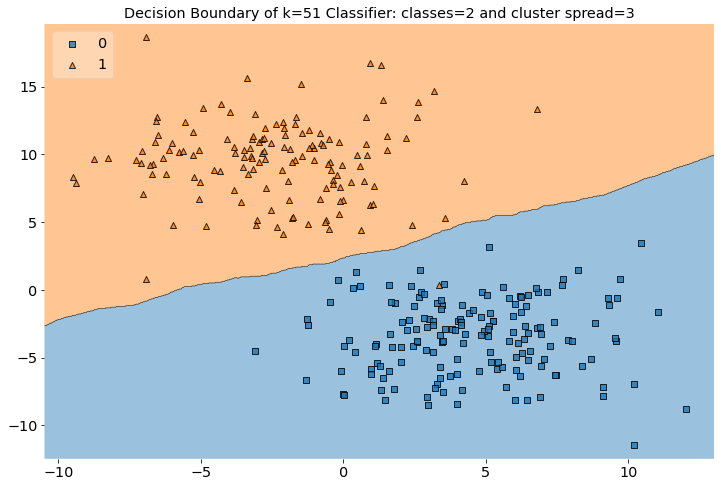

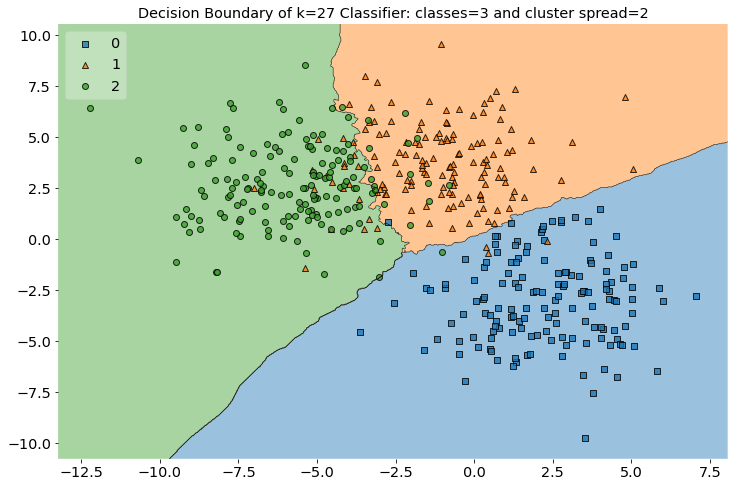

C:\Users\ioric\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


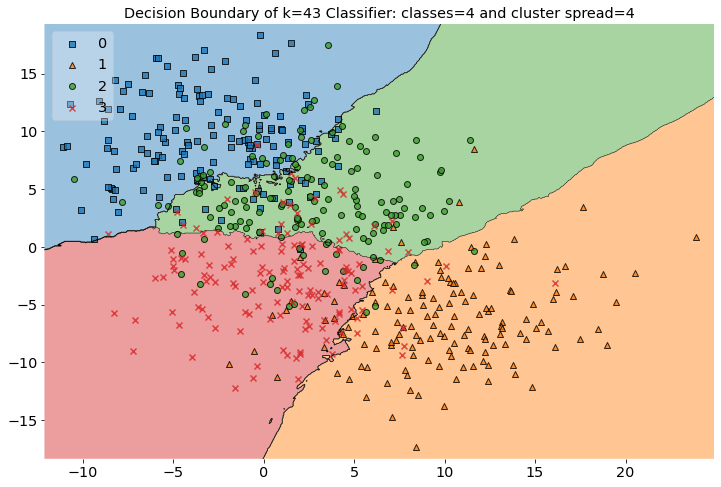

C:\Users\ioric\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


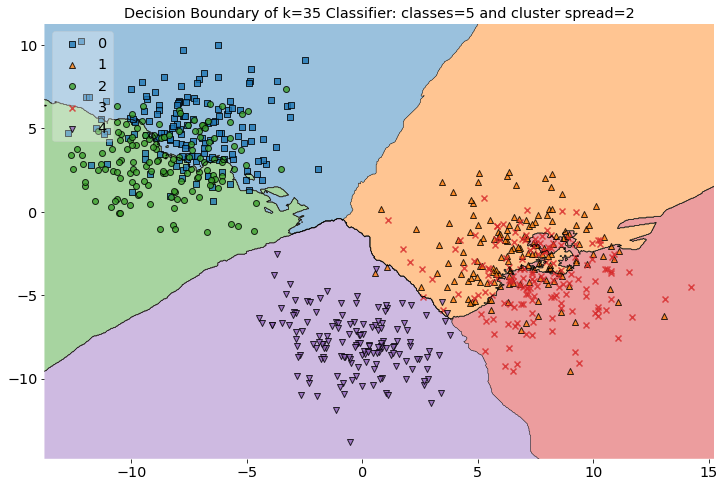

C:\Users\ioric\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


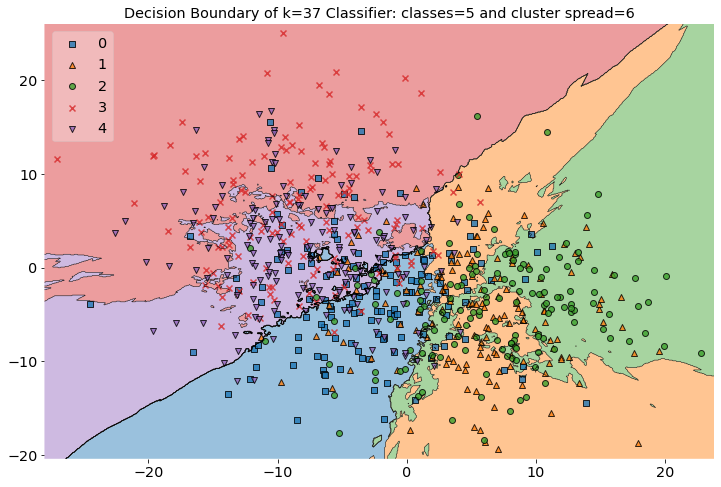

In [46]:
# add your code below
def change_and_plot_modified_dataset_stats(number_classes, cluster_spread):
    numClasses = number_classes # number of separate classes
    numObservations = numClasses*300 # number of total observations
    cluster_std = cluster_spread # spread of the classes, larger leads to more confusion
    
    # create a labeled dataset and make a pandas dataframe
    X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)

    # create 50/30/20 train/validation/test split as before
    X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)

    X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.40, random_state=42)


    train_accuracies_array = []
    val_accuracies_array = []
    k_neighbors = list(range(1, 52, 2))     #range of odd values of k from 1 to 51
    
    for k in k_neighbors:
        k_classifier = KNeighborsClassifier(n_neighbors=k) #create knn classifier
        k_classifier.fit(X_train, y_train) #train it
    
        train_accuracies_array.append(k_classifier.score(X_train, y_train))
        val_accuracies_array.append(k_classifier.score(X_val, y_val))

    max_value = np.max(val_accuracies_array)
    #print(max_value)
    kmax_values_array = []
    j = 0
    for i in k_neighbors:
        
        if val_accuracies_array[j] == max_value:
            kmax_values_array.append(i)
        j+=1
    
    #print(kmax_values_array)
    # CHOOSE THE HIGHEST INDEX IN ORDER TO AVOID OVERFITTING AND TO OBTAIN LOWER COMPLEXITY
    best_k_value = kmax_values_array[-1]
    
    best_k_classifier = KNeighborsClassifier(n_neighbors=best_k_value) # Create and train the best_k_value KNN classifier 
    best_k_classifier.fit(X_train, y_train)

    plt.figure()
    plot_decision_regions(X_train, y_train, clf=best_k_classifier, legend=2)
    plt.title('Decision Boundary of k={} Classifier: classes={} and cluster spread={}'.format(best_k_value, numClasses, cluster_std))
    plt.show()
        
change_and_plot_modified_dataset_stats(number_classes = 2, cluster_spread = 3)
change_and_plot_modified_dataset_stats(number_classes = 3, cluster_spread = 2)
change_and_plot_modified_dataset_stats(number_classes = 4, cluster_spread = 4)
change_and_plot_modified_dataset_stats(number_classes = 5, cluster_spread = 2)
change_and_plot_modified_dataset_stats(number_classes = 5, cluster_spread = 6)
    
    

Overall it can be seen that the cluster spread plays a huge role when it comes to the shape of the decision boundaries. A higher value of the cluster spread leads to less smooth boundaries and as it gets higher then they will not be clearly separated from one another, some of them will be spread also inside other decision boundaries. It can also be noticed that increasing the number of classes leads the decision boundaries to be more complex and there is a higher risk of misclassification since the classifier has to consider a higher number of neighbors from different classes.

# Part 2: Application

In this portion of the lab, you will work with audio recordings of two music genres: *Kiki* and *Bouba*. These genres are popular amongst the beings that inhabit the digital world. Download the zipfile from the Canvas lab 02 page, unzip, and put them somewhere you can find them. 

Below are two functions we will use to extract features from the audio data.

In [47]:
def extractZC( data, windowsizeinsamples, windowhopinsamples ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  numbersignchanges = []
  for ii in np.arange(totalnumberofwindows):
    windowstart = int(ii*windowhopinsamples)
    windowend = int(windowstart + windowhopinsamples)
    datasign = np.sign(data[windowstart:windowend])
    datasignderivative = datasign - np.roll(datasign,1)
    numbersignchanges.append(np.count_nonzero(datasignderivative[1:-1]))
  return np.array(numbersignchanges)

def extractSC( data, windowsizeinsamples, windowhopinsamples, samplerate ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  centroid = []
  freqs = np.arange(np.ceil(windowsizeinsamples/2.0)+1)*samplerate/windowsizeinsamples
  for ii in np.arange(totalnumberofwindows):
    windowstart = int(ii*windowhopinsamples)
    windowend = int(windowstart + windowsizeinsamples)
    DATA = np.abs(np.fft.fft(data[windowstart:windowend]))
    centroid.append(np.sum(freqs*DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])/
                    np.sum(DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)]))
  return np.array(centroid)

# 2.1 

Using the functions above, compute zero crossing and spectral centroid features for all kiki and bouba training data files using contiguous 100 ms frames. (Ignore any frames at the end of audio files that are less than that length.) Create a two-dimensional scatter plot of the features extracted from the training data. Below is what my scatter plot looks like, just so you know.

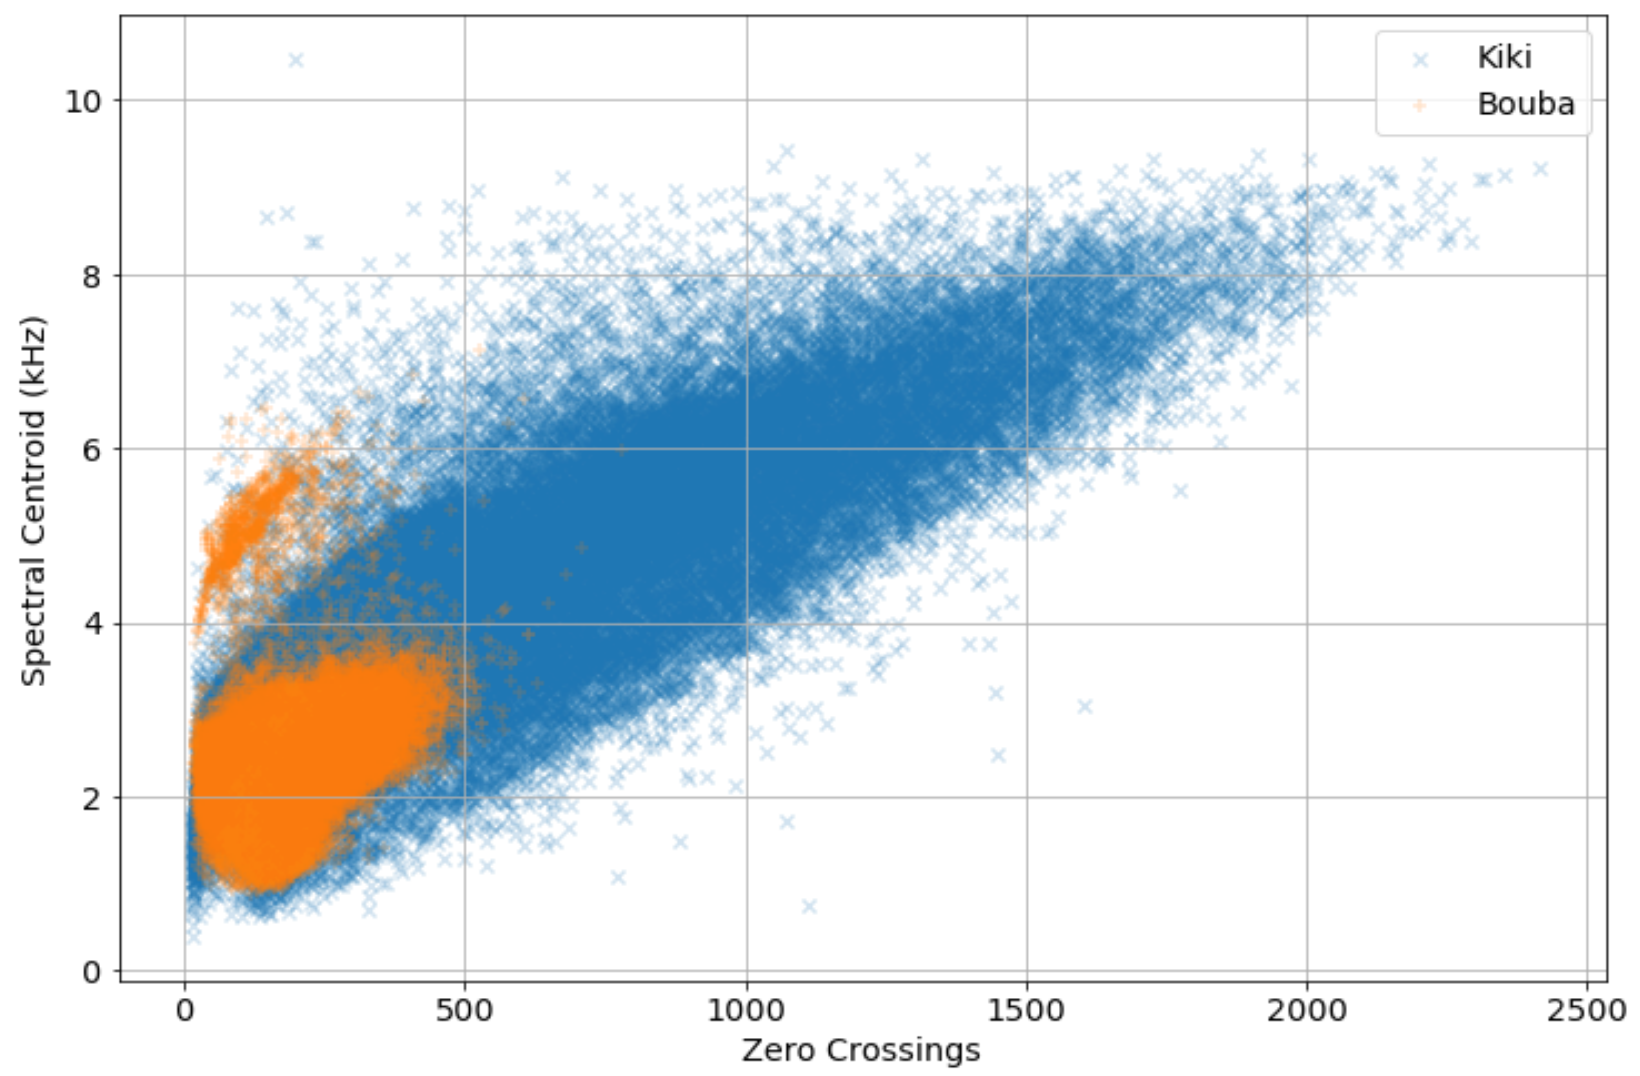

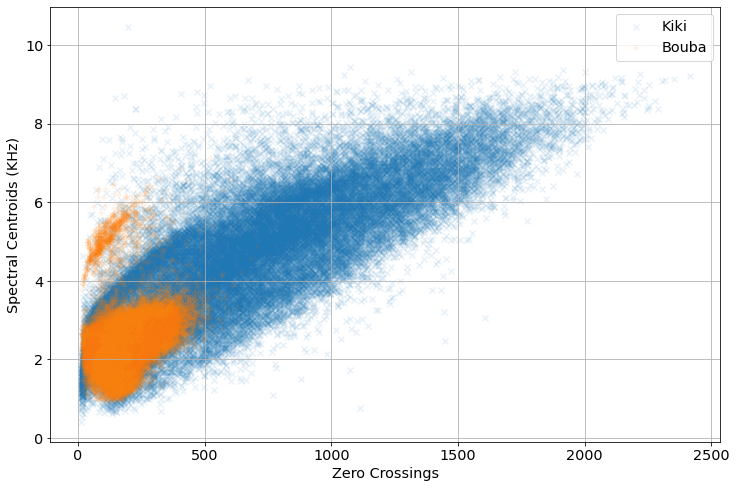

In [48]:
# add your code below
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt
import os
from sklearn import datasets 

#for kiki 
kiki_zc = []
kiki_sc = []
kiki_train = []
path_kiki = 'C:\\Users\\ioric\\Desktop\\KTH\\Music Informatics\\Labs\\Lab2\\KikiBoubadata\\kikibouba_train\\kiki\\'

for file in os.listdir(path_kiki):
    if file.endswith(".m4a"):
        kiki_train.append(file)

for file in kiki_train:
        kiki_sound_file = AudioSegment.from_file(path_kiki + file, format="m4a")
    
        kiki_sample_rate = kiki_sound_file.frame_rate
        kiki_frame_size = np.int64((100 * kiki_sample_rate )/ 1000)

        kiki_sound_to_array = np.array(kiki_sound_file.get_array_of_samples())

        kiki_hop_size = kiki_frame_size

        kiki_zc.append(extractZC(kiki_sound_to_array, kiki_frame_size, kiki_hop_size))
        kiki_sc.append(extractSC(kiki_sound_to_array, kiki_frame_size, kiki_hop_size, kiki_sample_rate)) 

kiki_zc_array = np.concatenate(kiki_zc)
kiki_sc_array = np.concatenate(kiki_sc) / 1000

#C:\\Users\\ioric\\Desktop\\KTH\\Music Informatics\\Labs\\Lab2\\KikiBoubadata\\kikibouba_train\\kiki\\

#for bouba 
bouba_zc = []
bouba_sc = []
bouba_train = []
path_bouba = 'C:\\Users\\ioric\\Desktop\\KTH\\Music Informatics\\Labs\\Lab2\\KikiBoubadata\\kikibouba_train\\bouba\\'

for file in os.listdir(path_bouba):
    if file.endswith(".m4a"):
        bouba_train.append(file)

for file in bouba_train:
        bouba_sound_file = AudioSegment.from_file(path_bouba + file, format="m4a")
    
        bouba_sample_rate = bouba_sound_file.frame_rate
        bouba_frame_size = np.int64((100 * bouba_sample_rate )/ 1000)

        bouba_sound_to_array = np.array(bouba_sound_file.get_array_of_samples())

        bouba_hop_size = bouba_frame_size

        bouba_zc.append(extractZC(bouba_sound_to_array, bouba_frame_size, bouba_hop_size))
        bouba_sc.append(extractSC(bouba_sound_to_array, bouba_frame_size, bouba_hop_size, bouba_sample_rate)) 
    
bouba_zc_array = np.concatenate(bouba_zc)
bouba_sc_array = np.concatenate(bouba_sc) / 1000

plt.figure()
plt.ylabel('Spectral Centroids (KHz)')
plt.xlabel('Zero Crossings')
plt.scatter(kiki_zc_array, kiki_sc_array, marker='x', alpha=0.1, label='Kiki')
plt.scatter(bouba_zc_array, bouba_sc_array, marker='+', alpha=0.1, label='Bouba')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# 2.2 

Create and plot histograms of the zero crossings feature and the spectral centroid feature for the class kiki. Use 50 bins. Do the same for bouba. Normalize each histogram by setting the parameter "density=True" in either [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) or [matplotlib.pyplot.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

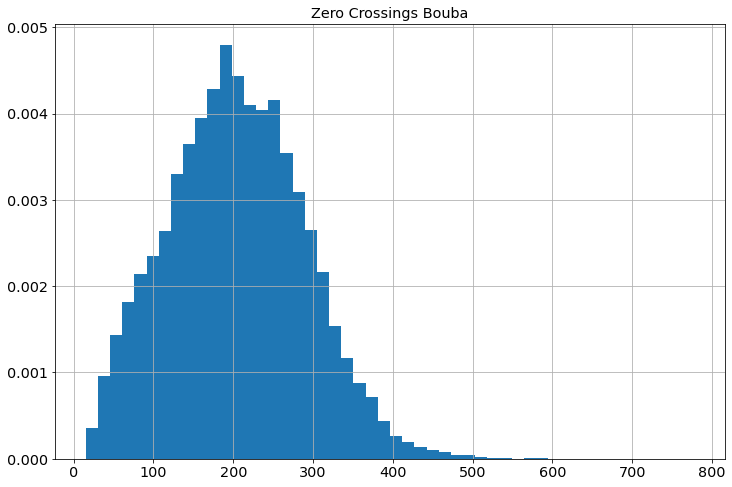

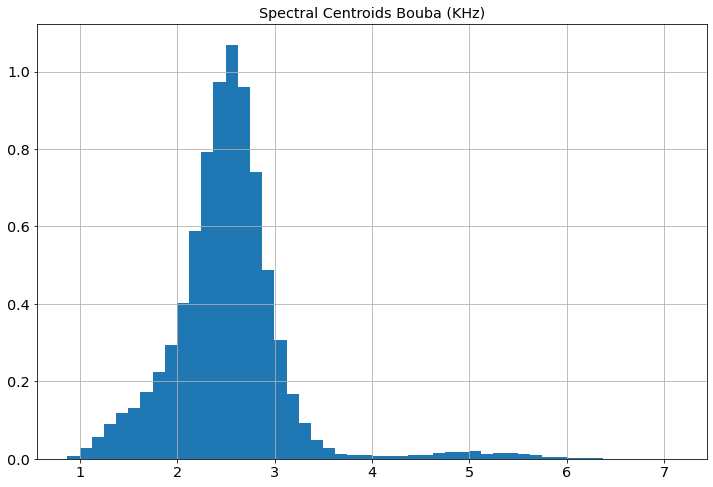

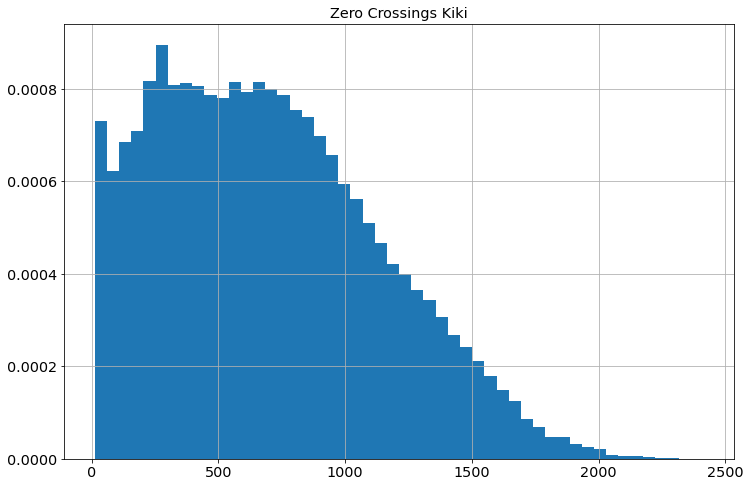

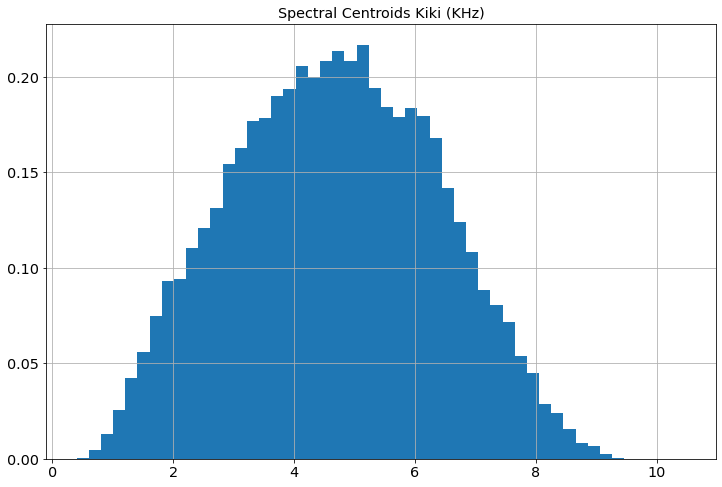

In [49]:
# add your code below
import pandas as pd

def do_histogram(array, name):
    
    data_frame = pd.DataFrame(array)
    histogram = data_frame.hist(density=True, bins=50)
    plt.title(name)

do_histogram(bouba_zc_array, 'Zero Crossings Bouba')
do_histogram(bouba_sc_array, 'Spectral Centroids Bouba (KHz)')
do_histogram(kiki_zc_array, 'Zero Crossings Kiki')
do_histogram(kiki_sc_array, 'Spectral Centroids Kiki (KHz)')


# 2.3 

Let's model *each* feature of the *each* class by a Gausssian distribution.
This means we want to approximate each histogram of each feature observed in class $g$ by a Gaussian function with mean $\mu_{*,g}$ and variance $\sigma_{*,g}^2$:
$$f_{X|G}(x|g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x-\mu_{*,g})^2/2\sigma_{*,g}^2\right ]$$

Use unbiased maximum likelihood estimation (MLE) to compute the parameters of the two distributions using your training observations. Remember, the MLE mean of $N$ numbers $\{x_1, x_2, \ldots, x_N\}$ is given by $$\hat\mu = \frac{1}{N}\sum_{n=1}^N x_n$$ and the MLE variance is given by $$\sigma^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n-\hat\mu)^2.$$

Plot these four distributions, overlayed on the normalized histograms of the features for the two classes.

Here's what mine look like:
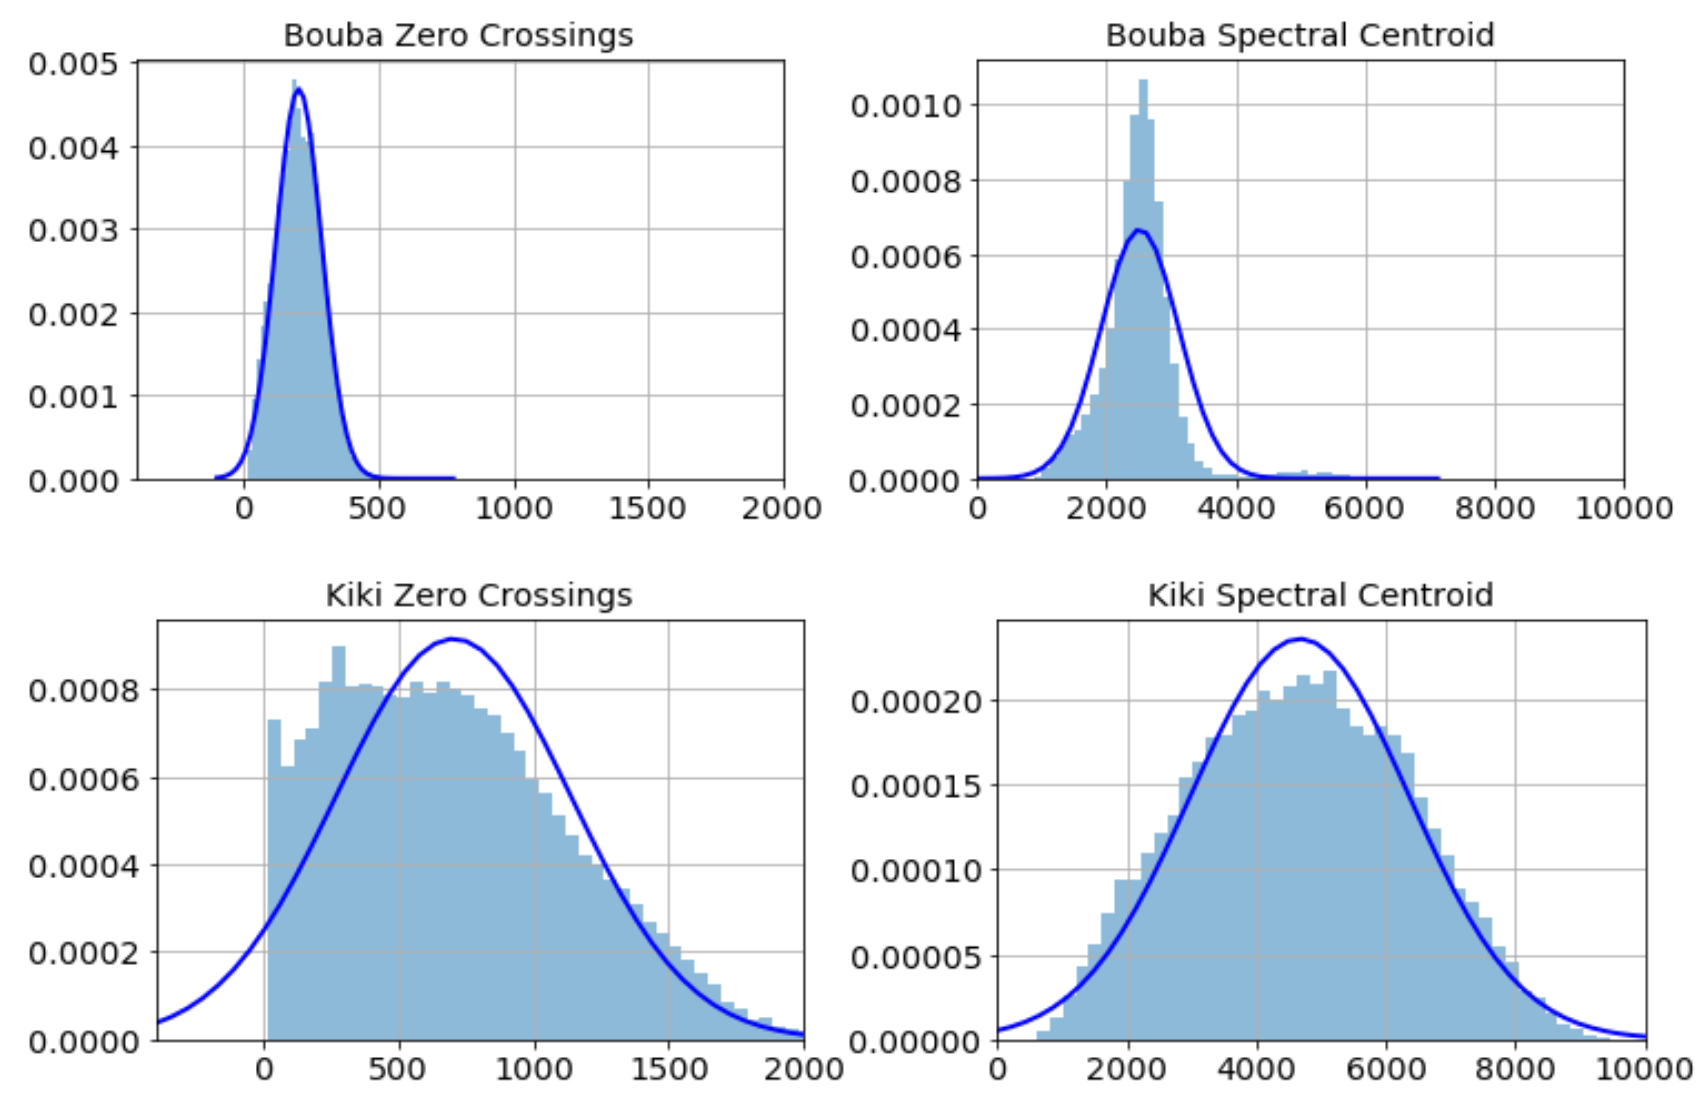

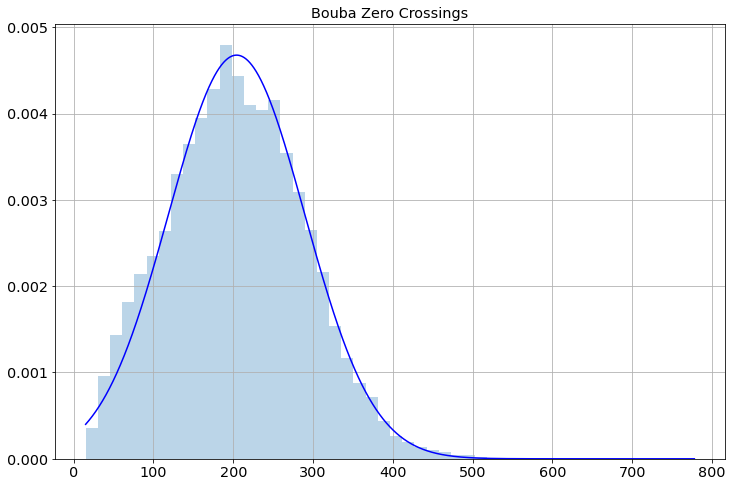

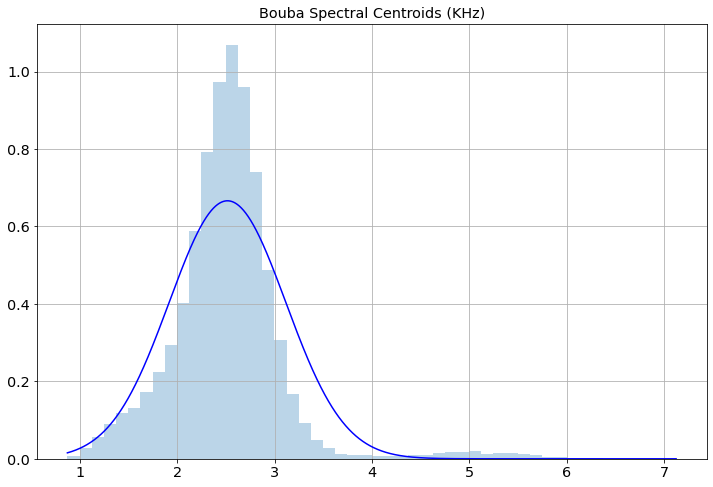

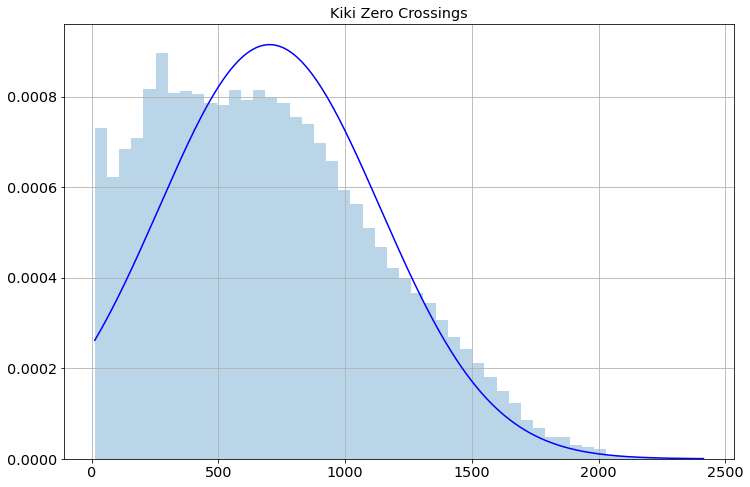

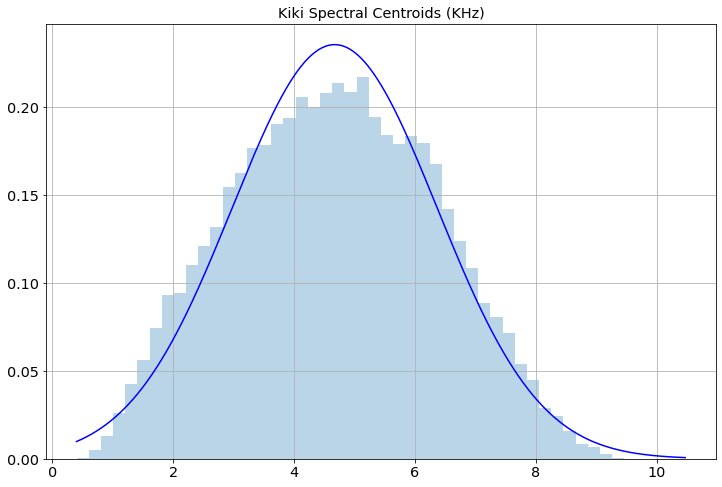

In [50]:
from scipy.stats import norm

# add your code below
def do_MLE_histogram(input, name):
    
    x_axis = np.linspace(np.amin(input), np.amax(input), input.shape[0])
    
    norm_var = norm(loc=np.mean(input), scale=np.std(input))

    data_frame = pd.DataFrame(input)
    
    histogram = data_frame.hist(density=True, bins=50, alpha=0.3)
    plt.plot(x_axis, norm_var.pdf(x_axis), color='blue')
    plt.title(name)
    
    return norm_var


bouba_zc_norm = do_MLE_histogram(bouba_zc_array, 'Bouba Zero Crossings')
bouba_sc_norm = do_MLE_histogram(bouba_sc_array, 'Bouba Spectral Centroids (KHz)')
kiki_zc_norm = do_MLE_histogram(kiki_zc_array, 'Kiki Zero Crossings',)
kiki_sc_norm = do_MLE_histogram(kiki_sc_array, 'Kiki Spectral Centroids (KHz)')


# 2.4

Given a particular two-dimensional observation $\mathbf{x}$ extracted from an audio file, we want to estimate the probaility of $\mathbf{x}$ coming from class $g \in \{\textrm{Kiki},\textrm{Bouba}\}$, i.e., the *posterior* $P[g|\mathbf{x}]$.
By Bayes' Theorem, we can express this probability as:

$$P[G=g|\mathbf{x}] = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]}{f_\mathbf{X}(\mathbf{x})}$$

where the *likelihood* $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$ is the probability density of observing $\mathbf{x}$ from class $g$, $P[G=g]$ is the *prior* probability of encountering $g$ regardless of what we observe, and $f_\mathbf{X}(\mathbf{x})$ is the probability density of observing $\mathbf{x}$ no matter what class.

We define the *posterior odds* of Kiki as the ratio:
$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{P[G=\textrm{Kiki}|\mathbf{x}]}{P[G=\textrm{Bouba}|\mathbf{x}]}$$
Similarly, the posterior odds of Bouba is the ratio 
$$O(G=\textrm{Bouba}|\mathbf{x}) = \frac{P[G=\textrm{Bouba}|\mathbf{x}]}{P[G=\textrm{Kiki}|\mathbf{x}]} =\frac{1}{O(G=\textrm{Kiki}|\mathbf{x})}.$$

These are easy to understand. For instance, if $O(G=\textrm{Kiki}|\mathbf{x}) = 2$, then according to our model Kiki is twice as likely given $\mathbf{x}$ than Bouba, or Bouba is half as likely as Kiki. By plugging in the equation for $P[G=g|\mathbf{x}]$, the odds of Kiki can be expressed

$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Kiki})}{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Bouba})}\frac{P[G=\textrm{Kiki}]}{P[G=\textrm{Bouba}]}$$

So the posterior odds of Kiki is just the product of the ratio of posterior probability densities and prior probabilities.

If for an observation $O(G=\textrm{Kiki}|\mathbf{x}) > 1$, then we might label it as Kiki. Otherwise we could label it Bouba.
We just need to compute the densities $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$.

This is where our Gaussian models come into play.
We know the first element of $\mathbf{x}$ is the zero crossing feature, and the second element is spectral centroid. If we assume these two features are independent, then:

$$f_{\mathbf{X}|G}(x_z,x_s|G=g) = f_{X_z|G}(x_z|G=g)f_{X_s|G}(x_s|G=g)$$

where $x_z$ is the zero crossing feature, and $x_s$ is the spectral centroid features.
If we assume each feature is distributed Gaussian, then

$$f_{X_*|G}(x_*|G=g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x_*-\mu_{*,g})^2/2\sigma_{*,g}^2\right ].$$

Given our estimates of these four parameters $\{\mu_{z,g},\sigma_{z,g}^2,\mu_{s,g},\sigma_{s,g}^2\}$ for Kiki and for Bouba, we are *almost* ready to build a classification system.

We need to estimate the prior probabilities, $P[G=\textrm{Kiki}]$ and $P[G=\textrm{Bouba}]$.

To do that, assume the training data reflects how observations are distributed in the real world, and estimate $P[G=\textrm{Kiki}]$ as the proportion of observations of Kiki in the training dataset, and $P[G=\textrm{Bouba}]$ as the proportion of observations of Bouba in the training dataset.

In [51]:
# add your code below
kiki_prior_probability= len(kiki_train)/ (len(bouba_train)+len(kiki_train))        #as in the formulas
bouba_prior_probability= len(bouba_train)/ + len(bouba_train)+(len(kiki_train))

# 2.5

Now write a function using all the parameters you have estimated that computes the posterior odds of Kiki given a two-dimensional observation, and returns 1 (Kiki) if the odds are greater than 2, and otherwise 0 (Bouba). Use the MLE parameters you found in the previous part.

In [52]:
# add your code below
def get_kiki_bouba_class(obs):
    
    mean_kiki0 = kiki_zc_norm.mean()
    std_kiki0 = kiki_zc_norm.std()
    mean_kiki1 = kiki_sc_norm.mean()
    std_kiki1 = kiki_sc_norm.std()

    factor_kiki_obs0 = 1/np.sqrt(2*np.pi*np.power(std_kiki0,2))* np.exp(-(np.power((obs[0] - mean_kiki0), 2)) / (2 * np.power(std_kiki0, 2)))
    factor_kiki_obs1 = 1/np.sqrt(2*np.pi*np.power(std_kiki1,2))* np.exp(-(np.power((obs[1] - mean_kiki1), 2)) / (2 * np.power(std_kiki1, 2)))
    
    likelihood_kiki =  factor_kiki_obs0 * factor_kiki_obs1
                     
    
    mean_bouba0 = bouba_zc_norm.mean()
    std_bouba0 = bouba_zc_norm.std()
    mean_bouba1 = bouba_sc_norm.mean()
    std_bouba1 = bouba_sc_norm.std()
    
    factor_bouba_obs0 = 1/np.sqrt(2*np.pi*np.power(std_bouba0,2))* np.exp(-(np.power((obs[0] - mean_bouba0), 2)) / (2 * np.power(std_bouba0, 2)))
    factor_bouba_obs1 = 1/np.sqrt(2*np.pi*np.power(std_bouba1,2))* np.exp(-(np.power((obs[1] - mean_bouba1), 2)) / (2 * np.power(std_bouba1, 2)))
    
    likelihood_bouba =  factor_bouba_obs0 * factor_bouba_obs1
                     
    
    prior_ratio = kiki_prior_probability / bouba_prior_probability
    likelihood_ratio = likelihood_kiki / likelihood_bouba
    posterior_odds = likelihood_ratio * prior_ratio 

    
    if posterior_odds > 2:
        return 1
    else:
        return 0

#try
#observation = (kiki_zc_array[400], kiki_sc_array[400])
#class_predicted = get_kiki_bouba_class(observation)
#print('Pclass predicted: ', class_predicted)

# 2.6 

Use your function to label all observations in the training data and create one scatter plot of the labeled Kiki observations, and one scatter plot of the labeled Bouba observations, both color-coded by the predicted labels. (This should take some time to compute because the classifier you have created is not very optimized.)

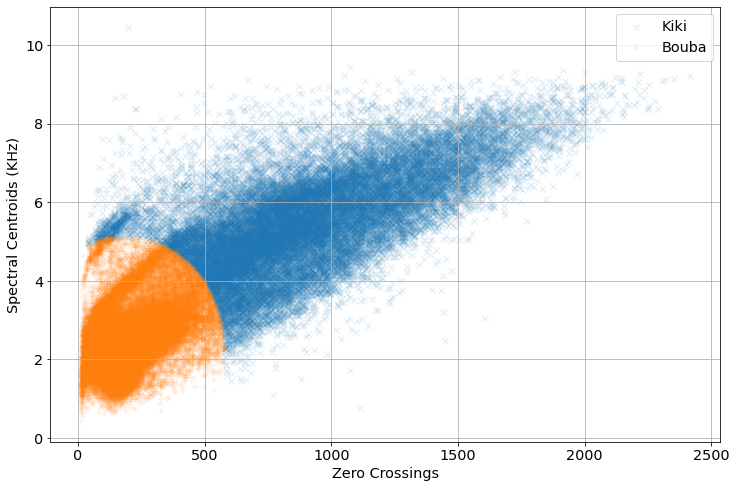

In [53]:
# add your code below


kiki_labels_ones = np.ones(kiki_zc_array.shape[0]) #kiki_bouba labels
bouba_labels_zeros = np.zeros(bouba_zc_array.shape[0]) 

kiki_bouba_train_labels = np.concatenate((bouba_labels_zeros, kiki_labels_ones))

kiki_bouba_train_zc = np.concatenate((bouba_zc_array, kiki_zc_array))   #training data
kiki_bouba_train_sc = np.concatenate((bouba_sc_array, kiki_sc_array))

kiki_bouba_train_observations = np.concatenate((kiki_bouba_train_zc, kiki_bouba_train_sc)).reshape((kiki_bouba_train_labels.shape[0], -1), order='F')

kiki_bouba_predicted_labels = np.empty(kiki_bouba_train_labels.shape, dtype=int)

for i, observations in enumerate(kiki_bouba_train_observations):
    kiki_bouba_predicted_labels[i] = get_kiki_bouba_class(observations)

kiki_indexes = np.where(kiki_bouba_predicted_labels == 1)
bouba_indexes = np.where(kiki_bouba_predicted_labels == 0)

bouba_predicted = kiki_bouba_train_observations[bouba_indexes[0]]
kiki_predicted = kiki_bouba_train_observations[kiki_indexes[0]]


plt.figure()
plt.ylabel('Spectral Centroids (KHz)')
plt.xlabel('Zero Crossings')
plt.scatter(kiki_predicted[:, 0], kiki_predicted[:, 1], marker='x', alpha=0.1, label='Kiki')
plt.scatter(bouba_predicted[:, 0], bouba_predicted[:, 1], marker='+', alpha=0.1, label='Bouba')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# 2.7

Explain what you see, and how it compares to the scatter plot you created in #2.1.

The boundary of kiki and bouba is too clear (like a circle) compared with the plot in 2.1. All kiki points inside the circle are wrongly classified as bouba, and all bouba points outside the circle are wrongly classified as kiki. In the plot in 2.1, there were more bouba points outisde the radius. But overall the majority of kiki and bouba points is classified well. 

# 2.8 
Compute a confusion table summarizing the results of your classifier on the training dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes.


Accuracy 
 0.8336536043060516

Balanced Accuracy 
 0.8212869896854906

Report 
               precision    recall  f1-score   support

           0      0.768     0.988     0.864     53385
           1      0.979     0.655     0.785     46010

    accuracy                          0.834     99395
   macro avg      0.874     0.821     0.825     99395
weighted avg      0.866     0.834     0.828     99395



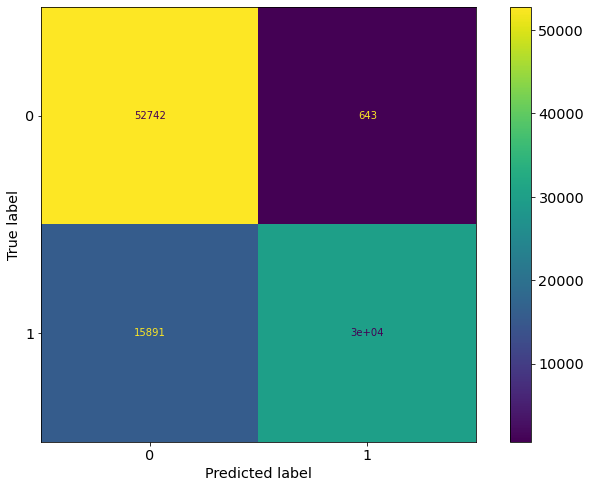

In [54]:
# add your code below
import sklearn.metrics as metrics

confusion_matrix = metrics.confusion_matrix(kiki_bouba_train_labels, kiki_bouba_predicted_labels)
confusion_matrix_plot = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=[0,1]).plot()

print('\nAccuracy \n', metrics.accuracy_score(kiki_bouba_train_labels, kiki_bouba_predicted_labels))
print('\nBalanced Accuracy \n', metrics.balanced_accuracy_score(kiki_bouba_train_labels, kiki_bouba_predicted_labels))

classification_report_print = metrics.classification_report(kiki_bouba_train_labels, kiki_bouba_predicted_labels, labels=[0,1], digits=3)
print('\nReport \n', classification_report_print)




# 2.9 

Use your function to label all observations in the testing dataset. Compute a confusion table summarizing the results of your classifier on the testing dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes. Compare with the results on the training dataset.


Accuracy 
 0.8327575392518991

Balanced Accuracy 
 0.8176393879750519

Report 
               precision    recall  f1-score   support

           0      0.772     0.983     0.865     54800
           1      0.970     0.652     0.780     45641

    accuracy                          0.833    100441
   macro avg      0.871     0.818     0.823    100441
weighted avg      0.862     0.833     0.826    100441



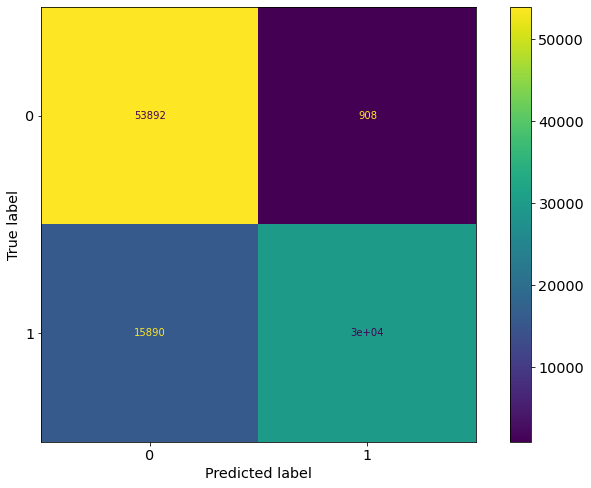

In [55]:
# add your code below
#for kiki 
test_kiki_zc = []
test_kiki_sc = []
kiki_test = []
path_kiki = 'C:\\Users\\ioric\\Desktop\\KTH\\Music Informatics\\Labs\\Lab2\\KikiBoubadata\\kikibouba_test\\kiki\\'

for file in os.listdir(path_kiki):
    if file.endswith(".m4a"):
        kiki_test.append(file)

for file in kiki_test:
        kiki_sound_file = AudioSegment.from_file(path_kiki + file, format="m4a")
    
        kiki_sample_rate = kiki_sound_file.frame_rate
        kiki_frame_size = np.int64((100 * kiki_sample_rate )/ 1000)

        kiki_sound_to_array = np.array(kiki_sound_file.get_array_of_samples())

        kiki_hop_size = kiki_frame_size

        test_kiki_zc.append(extractZC(kiki_sound_to_array, kiki_frame_size, kiki_hop_size))
        test_kiki_sc.append(extractSC(kiki_sound_to_array, kiki_frame_size, kiki_hop_size, kiki_sample_rate)) 

kiki_zc_array_test = np.concatenate(test_kiki_zc)
kiki_sc_array_test = np.concatenate(test_kiki_sc) / 1000

#for bouba 
test_bouba_zc = []
test_bouba_sc = []
bouba_test = []
path_bouba = 'C:\\Users\\ioric\\Desktop\\KTH\\Music Informatics\\Labs\\Lab2\\KikiBoubadata\\kikibouba_test\\bouba\\'

for file in os.listdir(path_bouba):
    if file.endswith(".m4a"):
        bouba_test.append(file)

for file in bouba_test:
        bouba_sound_file = AudioSegment.from_file(path_bouba + file, format="m4a")
    
        bouba_sample_rate = bouba_sound_file.frame_rate
        bouba_frame_size = np.int64((100 * bouba_sample_rate )/ 1000)

        bouba_sound_to_array = np.array(bouba_sound_file.get_array_of_samples())

        bouba_hop_size = bouba_frame_size

        test_bouba_zc.append(extractZC(bouba_sound_to_array, bouba_frame_size, bouba_hop_size))
        test_bouba_sc.append(extractSC(bouba_sound_to_array, bouba_frame_size, bouba_hop_size, bouba_sample_rate)) 
    
bouba_zc_array_test = np.concatenate(test_bouba_zc)
bouba_sc_array_test = np.concatenate(test_bouba_sc) / 1000


kiki_test_labels_ones = np.ones(kiki_zc_array_test.shape[0]) #kiki_bouba labels
bouba_test_labels_zeros = np.zeros(bouba_zc_array_test.shape[0]) 

kiki_bouba_test_labels = np.concatenate((bouba_test_labels_zeros, kiki_test_labels_ones))

kiki_bouba_test_zc = np.concatenate((bouba_zc_array_test, kiki_zc_array_test))   #training data
kiki_bouba_test_sc = np.concatenate((bouba_sc_array_test, kiki_sc_array_test))

kiki_bouba_test_observations = np.concatenate((kiki_bouba_test_zc, kiki_bouba_test_sc)).reshape((kiki_bouba_test_labels.shape[0], -1), order='F')

kiki_bouba_predicted_labels_test = np.empty(kiki_bouba_test_labels.shape, dtype=int)

for i, observations in enumerate(kiki_bouba_test_observations):
    kiki_bouba_predicted_labels_test[i] = get_kiki_bouba_class(observations)




confusion_matrix_test = metrics.confusion_matrix(kiki_bouba_test_labels, kiki_bouba_predicted_labels_test)
confusion_matrix_plot_test = metrics.ConfusionMatrixDisplay(confusion_matrix_test, display_labels=[0,1]).plot()

print('\nAccuracy \n', metrics.accuracy_score(kiki_bouba_test_labels, kiki_bouba_predicted_labels_test))
print('\nBalanced Accuracy \n', metrics.balanced_accuracy_score(kiki_bouba_test_labels, kiki_bouba_predicted_labels_test))

classification_report_print_test = metrics.classification_report(kiki_bouba_test_labels, kiki_bouba_predicted_labels_test, labels=[0,1], digits=3)
print('\nReport \n', classification_report_print_test)

# 2.10

Discuss several ways you might build a better Kiki-Bouba classifier.

i) The first way could be to extract more features like chroma features, rhythm and beat, other than just SC and ZC. More dimension analysis could improve the accuracy of the classification.          
ii) The distribution is treated as a normal distribution in our algorithm, but we should analyse first whether the true distribution of dataset is Gaussian or not. Maybe some more complicate statistical distributions could have a better performance.          
iii) We can try other classification algorithms like kNN or decision tree to classify them.